In [1]:
 # 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import joblib

In [2]:
#️ 2. Load Processed Dataset
file_path = r"C:\upgradMentornship\JUPYTER\Trafficproject_processed.csv"
df = pd.read_csv(file_path)

print("✅ Data Loaded")
print(df.head())

✅ Data Loaded
   Junction_id           Time_stamp  Traffic_volume  Temperature_c  Has_Rain  \
0            1  2015-11-01 06:00:00       -0.712922       2.632917       0.0   
1            1  2015-11-01 07:00:00        0.443725       0.876520       0.0   
2            1  2015-11-01 08:00:00       -0.616534       2.047451       0.0   
3            1  2015-11-01 09:00:00       -0.327373      -3.221741       0.0   
4            1  2015-11-01 10:00:00       -0.471954      -0.294412       0.0   

   Is_Event  Is_Weekend  Hour  DayOfWeek  Month    Lag_1h    Lag_3h    Lag_6h  
0         0           0     6          6     11 -0.327373  0.540112 -0.327373  
1         0           1     7          6     11 -0.712922 -0.327373 -0.375567  
2         1           0     8          6     11  0.443725 -0.327373 -0.471954  
3         1           1     9          6     11 -0.616534 -0.712922  0.540112  
4         0           1    10          6     11 -0.327373  0.443725 -0.327373  


In [3]:
#️ 3. Train-Test Split (Time-Based)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

X_train = train.drop(['Traffic_volume', 'Time_stamp'], axis=1)
y_train = train['Traffic_volume']
X_test = test.drop(['Traffic_volume', 'Time_stamp'], axis=1)
y_test = test['Traffic_volume']

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (38476, 11) Test shape: (9620, 11)


In [5]:
#️ 4. Train Random Forest Model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Performance")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")


🌲 Random Forest Performance
MAE: 0.1328
RMSE: 0.2354
R²: 0.7598


In [6]:
#️ 5. Train Gradient Boosting Model
gb = GradientBoostingRegressor(n_estimators=150, learning_rate=0.15, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("🌟 Gradient Boosting Performance")
print(f"MAE: {mae_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R²: {r2_gb:.4f}")


🌟 Gradient Boosting Performance
MAE: 0.1261
RMSE: 0.2271
R²: 0.7765


In [7]:
#️ 6. Cross-Validation (TimeSeriesSplit on Random Forest)
tscv = TimeSeriesSplit(n_splits=5)
rf = RandomForestRegressor(n_estimators=200, random_state=42)

cv_scores = cross_val_score(rf, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
print("Cross-validation MAE scores:", -cv_scores)
print("Average MAE:", -cv_scores.mean())

Cross-validation MAE scores: [0.30885905 0.20071812 0.1158927  0.14025537 0.14534119]
Average MAE: 0.18221328491742012


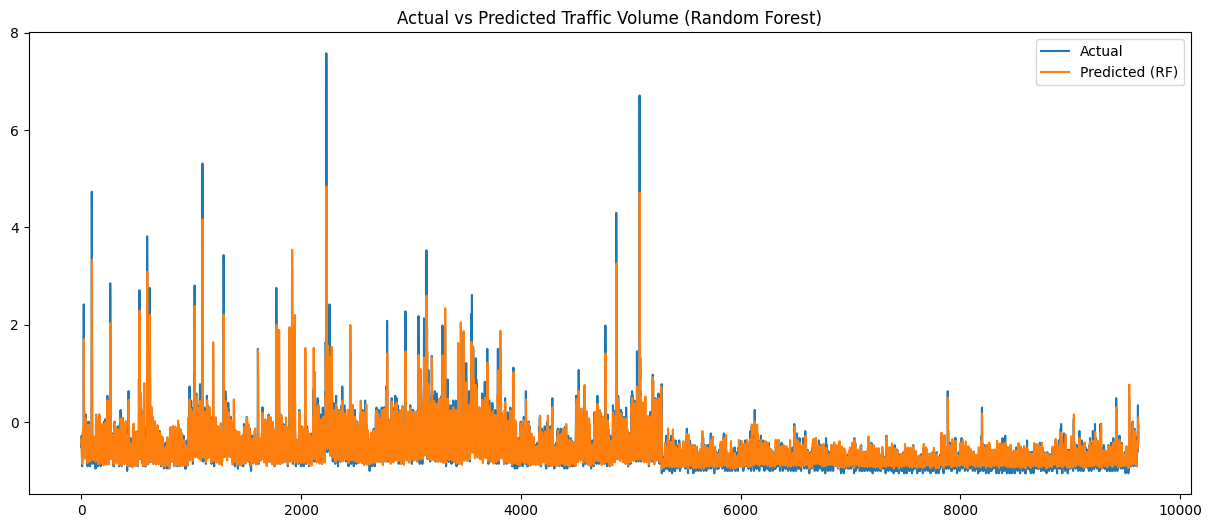

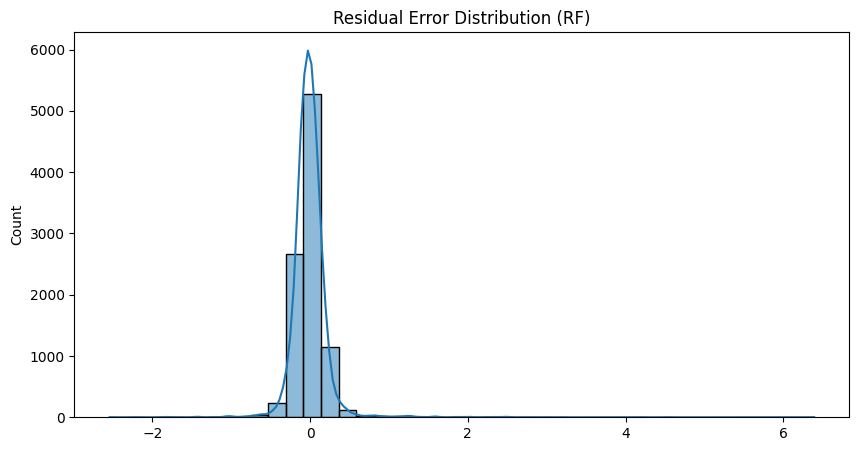

In [8]:
#️ 7. Visualizations

# Actual vs Predicted (Random Forest)
plt.figure(figsize=(15,6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_rf, label="Predicted (RF)")
plt.legend()
plt.title("Actual vs Predicted Traffic Volume (Random Forest)")
plt.show()

# Residuals (Errors)
residuals = y_test.values - y_pred_rf
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residual Error Distribution (RF)")
plt.show()


In [9]:
#️⃣ 8. Save Best Model
joblib.dump(rf, "traffic_rf_model.p")
print("✅ Model saved as traffic_rf_model.p")


✅ Model saved as traffic_rf_model.p
